In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns" , None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import random
import os
from tqdm import notebook
import gc
from string import punctuation
import chardet
import re
from datetime import datetime

from sklearn.pipeline import Pipeline , make_pipeline

np.random.seed(0)
random.seed(0)
pd.set_option("display.max_columns" , None)

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer , PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!ls '/content/drive/My Drive/LinkedIn/Outbound/Ajit_new/1.csv'

'/content/drive/My Drive/LinkedIn/Outbound/Ajit_new/1.csv'


#Reading CSV

In [4]:
data = pd.read_csv("/content/drive/My Drive/LinkedIn/mbti_1.csv",encoding='utf-8') #this is my drive link so change it
#final_data = pd.read_csv("/content/drive/My Drive/LinkedIn/Final_data.csv",encoding='latin1')
final_data = pd.read_csv('/content/drive/My Drive/LinkedIn/Outbound/Ajit_new/6.csv')

In [5]:
data.isnull().sum()

type     0
posts    0
dtype: int64

In [ ]:
final_data.isnull().sum()

_id                0
First Name         0
Last Name          0
locality           0
skills             0
                ... 
Unnamed: 171    6458
Unnamed: 172    6458
Unnamed: 173    6458
Unnamed: 174    6458
Unnamed: 175    6458
Length: 176, dtype: int64

In [ ]:
final_data = final_data.loc[:, ~final_data.columns.str.contains('^Unnamed')]

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6459 entries, 0 to 6458
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   _id                             6459 non-null   object
 1   First Name                      6459 non-null   object
 2   Last Name                       6459 non-null   object
 3   locality                        6459 non-null   object
 4   skills                          6459 non-null   object
 5   industry                        6459 non-null   object
 6   summary                         6458 non-null   object
 7   url                             6459 non-null   object
 8   also_view                       6459 non-null   object
 9   group                           6459 non-null   object
 10  overview_html                   6459 non-null   object
 11  interval                        6459 non-null   object
 12  specilities                     6459 non-null   

#Checking and dropping Null values

In [ ]:
final_data.dropna(inplace=True)
final_data.isnull().sum()

_id                               0
First Name                        0
Last Name                         0
locality                          0
skills                            0
industry                          0
summary                           0
url                               0
also_view                         0
group                             0
overview_html                     0
interval                          0
specilities                       0
events                            0
interests                         0
homepage                          0
honors                            0
Education_Major                   0
Education_Degree                  0
Education_Description             0
Education_Start                   0
Education_End                     0
Experience_Title                  0
Experience_Organisation           0
Experience_Start                  0
Experience_End                    0
Experience_Description            0
Experience_Title_single     

In [14]:
# a = "Ã¢â€¢Å¾Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â about david Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â¡studies thesisÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯david in may will get degree computer engineering roma treheÃ¢â‚¬â„¢s currently working his final thesis heÃ¢â‚¬â„¢s elaborating new information retrieval nlp techniques perform sentiment analysis brand monitoringwith work thesis david collaborating prof merialdo cybion srl a bigger project called Ã¢â‚¬Å“morningÃ¢â‚¬Âmost recent experiencesÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯from august september was san francisco participating the th Ã¢â‚¬Å“silicon valley study tourÃ¢â‚¬Â a winner the Ã¢â‚¬Å“innovation labÃ¢â‚¬Â competitiondavid took recently part a lot other business competition as nokia university program italia camp startup weekend Ã¢â‚¬Å“innovation campÃ¢â‚¬Â fullimmersion program it entrepreneurship an exnato base km romeworks progressÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯david now starting android programming heÃ¢â‚¬â„¢s working java programming his thesis enjoys discovering gamedeveloping worldin march learned program django python ormin february learned use Ã¢â‚¬Å“blueworksliveÃ¢â‚¬Â ibm platformlast works Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢â‚¬Â¢ python language learning with opengl computational geometry programmingÃ¢â‚¬Â¢ learning high performance computing studying parallel distributed algorithmsÃ¢â‚¬Â¢ development a web search engine focalized recipes using lucene javaÃ¢â‚¬Â¢ cryptography mobile security encryption techniques umtsÃ¢â€¢Å¾Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â informatics skills Ã¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢ÂÃ¢â€¢Â¡programming languagesÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯c java phyton django sql basic android bash vb aspnet ocaml plasmxml rdf xquery xml schema xslt xhtmlcss jspoperative systemsÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯linux windows androiddata development management swÃ¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯Ã¢Â¯eclipse mysql weka visual studio microsoft sql server postgressql db office software suites photoshop"
# a

In [15]:
# a.encode('utf-8').decode('ascii', 'ignore')

In [ ]:
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
final_data.head()

,_id,First Name,Last Name,locality,skills,industry,summary,url,also_view,group,overview_html,interval,specilities,events,interests,homepage,honors,Education_Major,Education_Degree,Education_Description,Education_Start,Education_End,Experience_Title,Experience_Organisation,Experience_Start,Experience_End,Experience_Description,Experience_Title_single,Experience_Organisation_single,Experience_Start_single,Experience_End_single,Experience_Description_single
0,in-davidschoonover,David,Schoonover,Greater Los Angeles Area,Mobile Marketing Direct Marketing SEM ...,Automotive,"17 years automotive OEM experience, interactiv...",http://www.linkedin.com/in/davidschoonover,[{'url': 'http://www.linkedin.com/pub/ryan-wei...,empty,empty,0,"Online Media, Social Media, Mobile Marketing, ...",[],Flying,empty,"['Awards:', 'Mobile Marketing Association: Bes...",,,,1998 1989,2002 1994,National Manager CRM and Digital Marketing,Kia Motors America Inc,May 2006,Present,,National Manager CRM and Digital Marketing,Kia Motors America Inc,May 2006,Present,
1,in-davidschou,David,Chou,San Francisco Bay Area,Perforce Subversion Unix Shell Scripting...,Computer Software,Here to help make your team stronger and help ...,http://www.linkedin.com/in/davidschou,"[{'url': 'http://www.linkedin.com/in/kaijing',...",{'affilition': ['Amazing Amazonians - Network ...,empty,0,empty,[],empty,empty,empty,empty,empty,empty,empty,empty,Build Release Engineer,Ruckus Wireless,August 2011,Present,As Ruckus first Build and Release Engineer I ...,Build Release Engineer,Ruckus Wireless,August 2011,Present,As Ruckus first Build and Release Engineer I ...
2,in-davidschroeder1,David,Schroeder,"Indianapolis, Indiana Area",Direct Sales Strategic Negotiations Grow...,Information Technology and Services,Strategic sales professional with extensive ne...,http://www.linkedin.com/in/davidschroeder1,[{'url': 'http://www.linkedin.com/in/mattmcgre...,"{'affilition': ['Business Development', 'Fishe...",empty,16,empty,[{'from': 'Konica Minolta Business Solutions (...,empty,empty,empty,Industrial Management,Bachelor of Science,,1996 1992,2000 1996,Business Development Manager District Sales M...,Fusion Alliance OfficeMax OfficeMax Konica Mi...,October 2007 August 2005 January 2003 2001,Present,Managed the Commercial Sales Team of reps th...,Business Development Manager,Fusion Alliance,October 2007,Present,
3,in-davidschueneman,David,Schueneman Top Linked,Greater Chicago Area,Full cycle Recruiting Recruitment Advertis...,Marketing and Advertising,My personal goal as a management professional ...,http://www.linkedin.com/in/davidschueneman,[{'url': 'http://www.linkedin.com/in/sherribed...,{'member': 'The Samaritan Network - http://sam...,empty,0,"Recruitment in the areas of Advertising, Produ...",[],"Pick up games of basketball, boxers as a breed...",empty,"[""Who's Who In Music 1981-1982,""]",,PHD,,1979,1982,Senior Partner Manager Quality Control Manager,CPS Inc ad one Trans World Music Corp Lasera...,February 1989 September 1994 March 1990,Present,Responsibility for multi million dollar recru...,Senior Partner,CPS Inc ad one,February 1989,Present,Responsibility for multi million dollar recru...
4,in-davidschultz,David,Schultz,Greater Seattle Area,BPO Offshore Call Center Underwriting ...,Insurance,Broad management experience in the insurance a...,http://www.linkedin.com/in/davidschultz,"[{'url': 'http://www.linkedin.com/in/cbarrow',...","{'affilition': ['EagleView Roof Measurements',...",empty,45,Enterprise level operations management; Call c...,"[{'from': 'Ryland Group', 'to': 'ZC Sterling',...","Personal interests include, Coauthor of the bo...",empty,empty,Management Management,MBA BS,,,,EVP Global Operations Managing Consultant Man...,EagleView Technologies Inc David Schultz Cons...,August 2008 June 2007 November 2005 January ...,Present,Responsible for all domestic and offshore ope...,EVP Global Operations,EagleView Technologies Inc,August 2008,Present,Responsible for all domestic and offshor

## **Removing rows with empty text**

In [ ]:
indexNames = final_data[final_data['summary'] == 'empty' ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [ ]:
final_data.drop(indexNames , inplace=True) #do this

## **Removing rows with blank value**

In [ ]:
indexNames = final_data[final_data['summary'] == ' ' ].index #do this 
indexNames

Int64Index([], dtype='int64')

In [ ]:
final_data.drop(indexNames , inplace=True) #do this

In [ ]:
df_temp = final_data
df_sum = pd.DataFrame(df_temp['summary'],columns=['summary']) #do this

In [ ]:
df_sum.head()

,summary
0,"17 years automotive OEM experience, interactiv..."
1,Here to help make your team stronger and help ...
2,Strategic sales professional with extensive ne...
3,My personal goal as a management professional ...
4,Broad management experience in the insurance a...


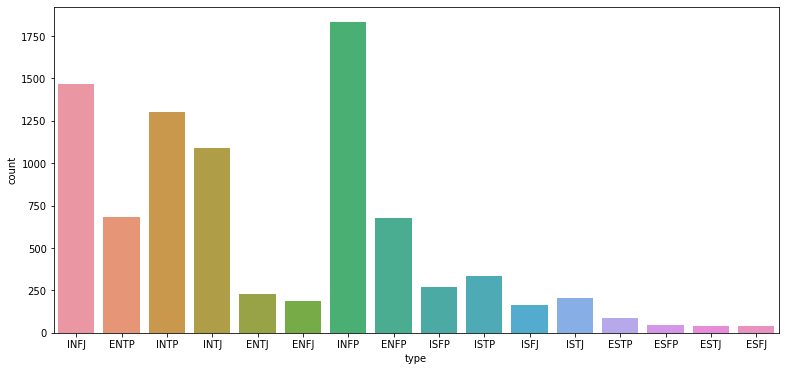

In [ ]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x="type", data=data)

In [ ]:
p1 = []
p2 = []
p3 = []
p4 = []

df_personality = pd.DataFrame()
for val in data['type']:
  p1.append(val.split()[0][0])
  p2.append(val.split()[0][1])
  p3.append(val.split()[0][2])
  p4.append(val.split()[0][3])

df_personality['Personality-1'] = p1
df_personality['Personality-2'] = p2
df_personality['Personality-3'] = p3
df_personality['Personality-4'] = p4

data = pd.concat([data,df_personality],axis=1)

In [ ]:
data.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


In [ ]:
#Let's map them to their actual meaning to make more sense out of it
personality_map = {
    "I":"Introvert",
    "E":"Extrovert",
    "N":"Intuitive",
    "S":"Sensitive",
    "F":"Emotional",
    "T":"Thinker",
    "J":"Judgemental",
    "P":"Perceiving"
}

for col in data.loc[: , "Personality-1":"Personality-4"].columns:
    data[col] = data[col].map(personality_map)

In [ ]:
data.head()

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert,Intuitive,Emotional,Judgemental
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert,Intuitive,Thinker,Perceiving
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert,Intuitive,Thinker,Perceiving
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert,Intuitive,Thinker,Judgemental
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert,Intuitive,Thinker,Judgemental


In [ ]:
pip install googletrans

     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 962kB 20.5MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=b2e349ed6f0852cf88dc889221be0b1a10e392e57d6f73281be629ab16bb3b92
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=9e26f130bde6b4d994de8aea87e25626f3c99ee6efe3c06c4d58582f375acab1
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


#Translate to English

In [ ]:
# from googletrans import Translator
# translation =  []
# translator = Translator()

# for val in df_sum['summary']:
#   a = translator.translate(val)
#   translation.append(a.text)
#   # print(val)
#   # print(a.text)
  
# df_sum['English_Summary'] = translation

In [ ]:
from googletrans import Translator
translator = Translator()

df_sum['English_Summary'] = df_sum['summary'].apply(lambda x: translator.translate(x, dest='en').text )

In [ ]:
df_sum.head()

,summary,English_Summary
0,"17 years automotive OEM experience, interactiv...","17 years automotive OEM experience, interactiv..."
1,Here to help make your team stronger and help ...,Here to help make your team stronger and help ...
2,Strategic sales professional with extensive ne...,Strategic sales professional with extensive ne...
3,My personal goal as a management professional ...,My personal goal as a management professional ...
4,Broad management experience in the insurance a...,Broad management experience in the insurance a...


In [ ]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

In [ ]:
pip install contractions

     |████████████████████████████████| 245kB 9.1MB/s 
     |████████████████████████████████| 317kB 13.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81692 sha256=9661006914df5238ae2b7e4d9c00ee43cb1c01605991dca46cea8760387cfe25
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [ ]:
import contractions

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

In [ ]:
data["clean-posts"] = data["posts"].apply(remove_URL)
df_sum['English_Summary'] = df_sum['English_Summary'].apply(remove_URL)

In [ ]:
data["clean-posts"] = data["clean-posts"].apply(replace_contractions)
df_sum['English_Summary'] = df_sum['English_Summary'].apply(replace_contractions)

In [ ]:
#df_sum.to_csv('/content/drive/My Drive/LinkedIn/translated.csv',index=None)

In [ ]:
#data.to_csv('/content/drive/My Drive/LinkedIn/ajit.csv',index=None)

Text Cleaning

In [ ]:
import nltk
nltk.download("stopwords")

def clean_data(text,clean_stopwords=True,clean_puntuation=True,clean_numbers=True):
    text = text.lower()
    text = text.strip() #Leading and trailing whitespaces are removed
    text = text.strip("'") 
    text = text.strip()
    pattern = pattern = r"\|\|\|"
    f = lambda x : re.sub(pattern , " " , x)
    text = f(text)
    #Clean web links
    pattern = r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*"
    f = lambda x: re.sub(pattern , "" , x)
    text = f(text)

    if clean_stopwords == True:
        #Clean Stopwords
        stopword = r"|".join([f"\s{word}\s" for word in stopwords.words("english")])
        f = lambda x : re.sub(stopword, " " , x)
        text = f(text)
    if clean_puntuation == True:
        #Clean punctuations
        #Let's not remove apostrohspe "'' so our text can make more sense
        punctuations = punctuation.replace("'" , "")
        punctuations = f"[{punctuations}]"
        f = lambda x : re.sub(punctuations , "" , text)
        text = f(text)
    if clean_numbers == True:
        #Clean Numbers
        f = lambda x : re.sub(r"[0-9]+" , "" , x)
        text = f(text)
    
    # Join the characters again to form the string.
    text = ' '.join(text.split())
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data["clean-posts"] = data["clean-posts"].apply(clean_data)

In [ ]:
df_sum['clean_summ'] = df_sum['English_Summary'].apply(clean_data) #new part

In [ ]:
def remove_whitespace(x):
    """
    Helper function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = " ".join(x.split())

    except:
        pass
    return x

In [ ]:
data["clean-posts"] = data["clean-posts"].apply(remove_whitespace)
df_sum['clean_summ'] = df_sum['clean_summ'].apply(remove_whitespace)

In [ ]:
#remove non ascii characters

df_sum['Ultra_clean'] = [x.encode('utf-8').decode('ascii', 'ignore') for x in df_sum['clean_summ']]
data["Ultra_clean_post"] = [x.encode('utf-8').decode('ascii', 'ignore') for x in data["clean-posts"]]

In [ ]:
data["length"] = data["Ultra_clean_post"].apply(len)
df_sum['Length'] = df_sum['Ultra_clean'].apply(len) #new part

Dropping the column with empty string

In [ ]:
indexNames = data[data["length"] == 0 ].index #do this 
indexNames

Int64Index([3559], dtype='int64')

In [ ]:
data.drop(indexNames , inplace=True) #do this

In [ ]:

indexNames = df_sum[df_sum['Length'] ==0 ].index #do this 
indexNames

Int64Index([1480, 2040, 2899, 3327, 3745, 3797, 4075, 4701, 4796, 4867, 5174,
            5876, 5965, 6221],
           dtype='int64')

In [ ]:
df_sum.drop(indexNames , inplace=True) #do this

In [ ]:
def remove_unwanted_words(df,columns,words):

  indexNames = df[df[columns] == words ].index #do this 
  indexNames

  df.drop(indexNames , inplace=True) #do this

  return df

In [ ]:
df_sum = remove_unwanted_words(df_sum,'summary','#NAME?')
df_sum = remove_unwanted_words(df_sum,'summary','Dropbox!')
df_sum = remove_unwanted_words(df_sum,'summary','Android')
df_sum = remove_unwanted_words(df_sum,'summary','Builder.')
df_sum = remove_unwanted_words(df_sum,'summary','IBD')

In [ ]:
data.to_csv('/content/drive/My Drive/LinkedIn/ajit.csv',index=None)
df_sum.to_csv('/content/drive/My Drive/LinkedIn/translated_6.csv',encoding = 'utf-8',index=None)

## **Don't run after this**

In [ ]:
data.head(5)

,type,posts,Personality-1,Personality-2,Personality-3,Personality-4,clean-posts,length
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,Introvert,Intuitive,Emotional,Judgemental,and intj moments sportscenter top ten plays pr...,2414
1,ENTP,'I'm finding the lack of me in these posts ver...,Extrovert,Intuitive,Thinker,Perceiving,i finding lack me these posts alarming sex be ...,4534
2,INTP,'Good one _____ https://www.youtube.com/wat...,Introvert,Intuitive,Thinker,Perceiving,good one course which say know is blessing my ...,3567
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",Introvert,Intuitive,Thinker,Judgemental,dear intp enjoyed conversation other day esote...,4392
4,ENTJ,'You're fired.|||That's another silly misconce...,Extrovert,Intuitive,Thinker,Judgemental,you fired is another silly misconception appro...,4046


In [ ]:
df_sum.head()

,summary,English_Summary,clean_summ,Length
0,Actualmente trabaja en el IIC como Responsable...,She currently works at the IIC as Head of Busi...,she currently works the iic head business deve...,406
1,"Native Portuguese, Fluent in English, Spanish,...","Native Portuguese, Fluent in English, Spanish,...",native portuguese fluent english spanish basic...,309
2,Ana Mota is an Oracle DBA OCA certified develo...,Ana Mota is an Oracle DBA OCA certified develo...,ana mota an oracle dba oca certified developer...,490
3,Minha carreira foi desenvolvida com experiênci...,My career was developed with professional expe...,my career developed professional experience th...,451
4,Llevo formándome y trabajando en el mundo de l...,I have been training and working in the world ...,i been training working the world psychotherap...,689


In [ ]:
introverts_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-1"] == "Introvert"]])
extroverts_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-1"] == "Extrovert"]])
intutives_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-2"] == "Intuitive"]])
sensitive_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-2"] == "Sensitive"]])
emotional_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-3"] == "Emotional"]])
thinkers_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-3"] == "Thinker"]])
judgemental_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-4"] == "Judgemental"]])
perceivers_clean_text_corpus = " ".join([text for text in data["clean-posts"][data["Personality-4"] == "Perceiving"]])

In [ ]:
introverts_word_cloud = WordCloud(random_state=0).generate(introverts_clean_text_corpus)
extroverts_word_cloud = WordCloud(random_state=0).generate(extroverts_clean_text_corpus)
intuitives_word_cloud = WordCloud(random_state=0).generate(intutives_clean_text_corpus)
sensitive_word_cloud = WordCloud(random_state=0).generate(sensitive_clean_text_corpus)
judgemental_word_cloud = WordCloud(random_state=0).generate(judgemental_clean_text_corpus)
perceivers_word_cloud = WordCloud(random_state=0).generate(perceivers_clean_text_corpus)

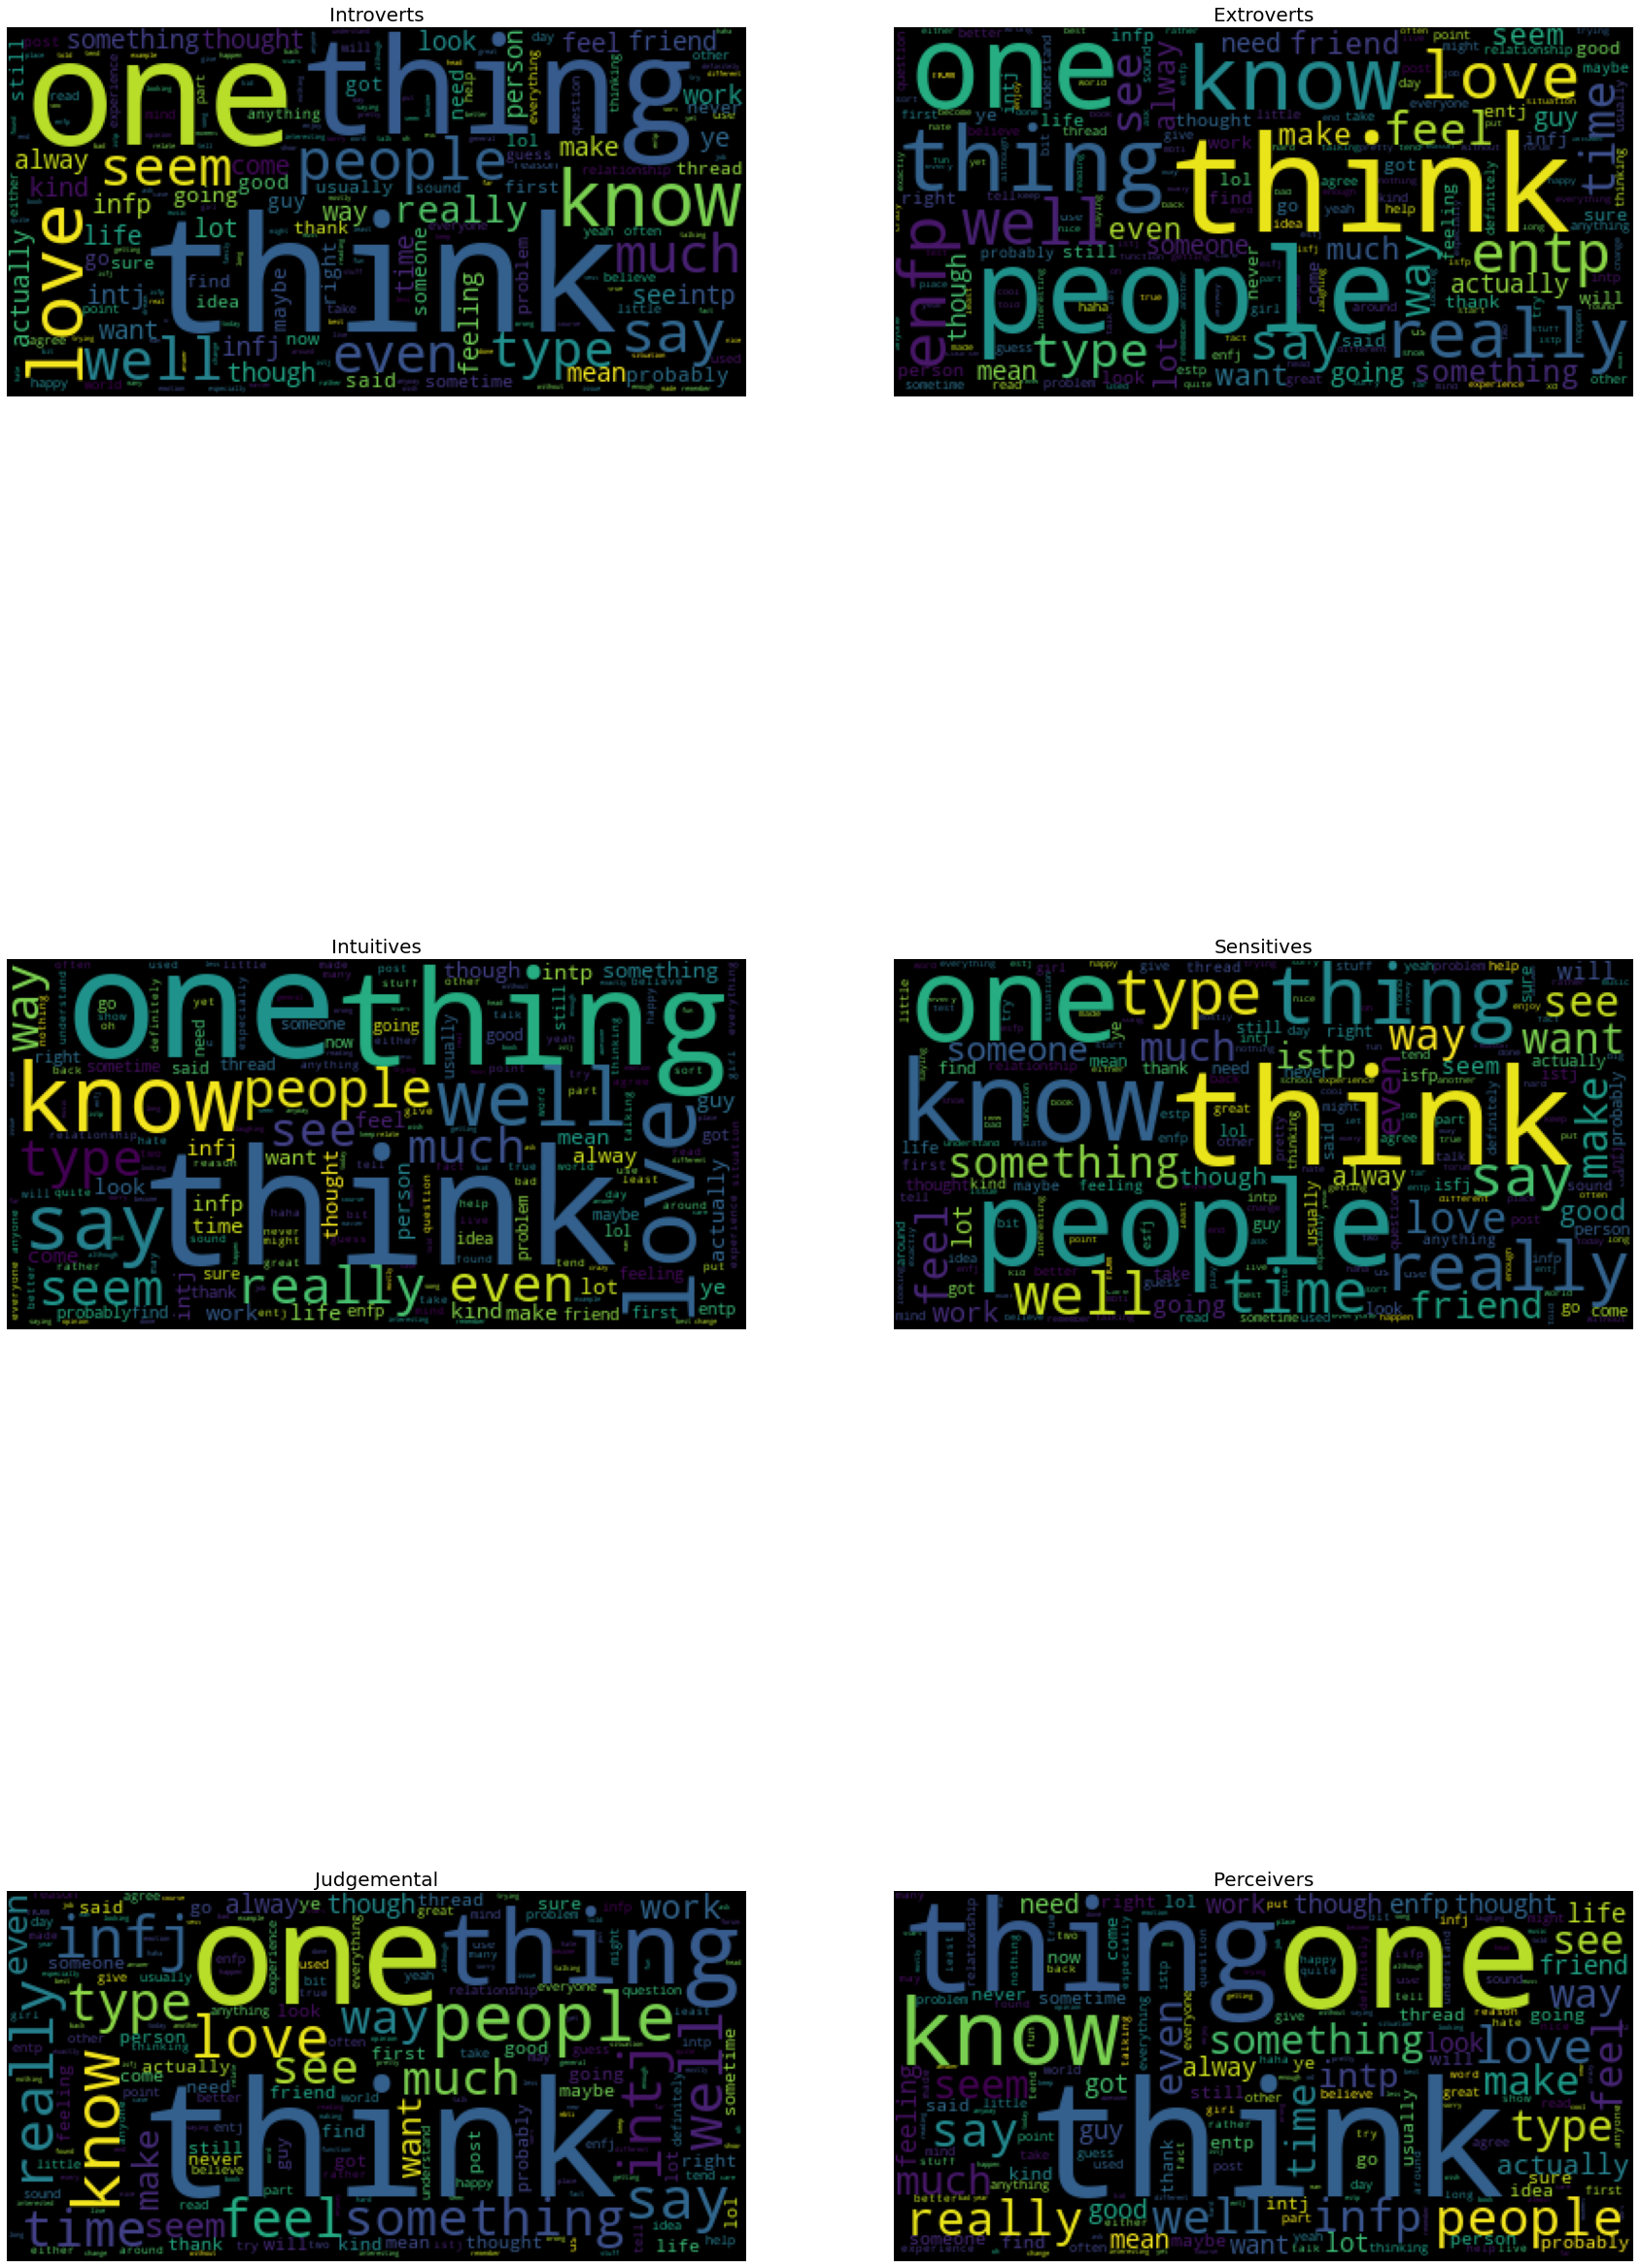

In [ ]:
fig , ax = plt.subplots(3,2,figsize=(30,50))
ax = ax.flatten()

ax[0].imshow(introverts_word_cloud)
ax[0].set_title("Introverts" , fontsize = 20)
ax[0].axis(False)

ax[1].imshow(extroverts_word_cloud)
ax[1].set_title("Extroverts" , fontsize = 20)
ax[1].axis(False)

ax[2].imshow(intuitives_word_cloud)
ax[2].set_title("Intuitives" , fontsize = 20)
ax[2].axis(False)

ax[3].imshow(sensitive_word_cloud)
ax[3].set_title("Sensitives" , fontsize = 20)
ax[3].axis(False)

ax[4].imshow(judgemental_word_cloud)
ax[4].set_title("Judgemental" , fontsize = 20)
ax[4].axis(False)

ax[5].imshow(perceivers_word_cloud)
ax[5].set_title("Perceivers" , fontsize = 20)
ax[5].axis(False)

plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
countVectorizer = CountVectorizer()
tfidfVectorizer = TfidfVectorizer()

In [ ]:
train , test = train_test_split(data , test_size=0.2 , shuffle = False)
train , val = train_test_split(train , test_size=0.1 , shuffle=False)
train.shape , val.shape , test.shape

((6245, 8), (694, 8), (1735, 8))

In [ ]:
y_train = train.loc[: , "Personality-1":"Personality-4"].values
y_val = val.loc[: , "Personality-1":"Personality-4"].values
y_test = a = test.loc[: , "Personality-1":"Personality-4"].values

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(train["clean-posts"], y_train)
# print(X_sm.shape, y_sm.shape)

In [ ]:
a = train["clean-posts"]

In [ ]:
a.shape

(6245,)

In [ ]:
y_train.shape

(6245, 4)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(a, y_train)
# print(X_sm.shape, y_sm.shape)

In [ ]:
#For Bag of Words Vector
train_bow = countVectorizer.fit_transform(train["clean-posts"])
val_bow = countVectorizer.transform(val["clean-posts"])
test_bow = countVectorizer.transform(test["clean-posts"])

#For Tfidf Vector
train_tfidf = tfidfVectorizer.fit_transform(train["clean-posts"])
val_tfidf = tfidfVectorizer.transform(val["clean-posts"])
test_tfidf = tfidfVectorizer.transform(test["clean-posts"])

In [ ]:
train_bow.shape , val_bow.shape , test_bow.shape

((6245, 116916), (694, 116916), (1735, 116916))

In [ ]:
train_tfidf.shape , val_tfidf.shape , test_tfidf.shape

((6245, 116916), (694, 116916), (1735, 116916))

Model Training

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , log_loss , confusion_matrix , classification_report

In [ ]:

mulitLabelBinarizer = MultiLabelBinarizer()

y_train = mulitLabelBinarizer.fit_transform(y_train)
y_val = mulitLabelBinarizer.transform(y_val)
y_test = mulitLabelBinarizer.transform(y_test)

classes = mulitLabelBinarizer.classes_

mulitLabelBinarizer.classes_

array(['Emotional', 'Extrovert', 'Introvert', 'Intuitive', 'Judgemental',
       'Perceiving', 'Sensitive', 'Thinker'], dtype=object)

In [ ]:
y_train.shape

(6245, 8)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(train_bow, y_train)
# print(X_sm.shape, y_sm.shape)

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE('minority')

# X_sm, y_sm = smote.fit_sample(val_bow, y_val)
# print(X_sm.shape, y_sm.shape)

In [ ]:
actual = countVectorizer.transform(df_sum["clean_summ"]) # do this also

In [ ]:
next = []
prediction_summ = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    #X = X_sm
    y = y_train[: , num]
    #y = y_sm[: , num]
    lr = LogisticRegression(C=1)
    lr.fit(X , y)
    val_pred = lr.predict(val_bow)
    test_pred = lr.predict(test_bow)
    act_pred = lr.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next.append(test_pred)
    prediction_summ.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.8160621761658031
Test Score: 0.830168776371308
Acc Validation Score: 0.80835734870317
Acc Test Score: 0.8259365994236312

1
Processing for Extrovert
Validation Score: 0.5691056910569106
Test Score: 0.6210826210826211
Acc Validation Score: 0.8170028818443804
Acc Test Score: 0.8190201729106629

2
Processing for Introvert
Validation Score: 0.8704028021015762
Test Score: 0.8692196531791907
Acc Validation Score: 0.8170028818443804
Acc Test Score: 0.8190201729106629

3
Processing for Intuitive
Validation Score: 0.9042386185243328
Test Score: 0.9247730220492867
Acc Validation Score: 0.8861671469740634
Acc Test Score: 0.8968299711815562

4
Processing for Judgemental
Validation Score: 0.6487455197132617
Test Score: 0.6734059097978227
Acc Validation Score: 0.7219020172910663
Acc Test Score: 0.7314121037463976

5
Processing for Perceiving
Validation Score: 0.7710843373493976
Test Score: 0.7655677655677655
Acc Validation Score: 0.7219020172910663
Acc 

In [ ]:
from sklearn.linear_model import SGDClassifier
next_1 = []
prediction_summ_1 = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    y = y_train[: , num]
    SGD = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
    SGD.fit(X , y)
    val_pred = SGD.predict(val_bow)
    test_pred = SGD.predict(test_bow)
    act_pred = SGD.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next_1.append(test_pred)
    prediction_summ_1.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.8555555555555555
Test Score: 0.8427947598253275
Acc Validation Score: 0.8256484149855908
Acc Test Score: 0.8270893371757925

1
Processing for Extrovert
Validation Score: 0.6016260162601627
Test Score: 0.6422287390029325
Acc Validation Score: 0.8285302593659942
Acc Test Score: 0.8259365994236312

2
Processing for Introvert
Validation Score: 0.8774080560420315
Test Score: 0.8708751793400287
Acc Validation Score: 0.8285302593659942
Acc Test Score: 0.8259365994236312

3
Processing for Intuitive
Validation Score: 0.8766716196136701
Test Score: 0.8806682577565632
Acc Validation Score: 0.8746397694524496
Acc Test Score: 0.8772334293948126

4
Processing for Judgemental
Validation Score: 0.7874015748031497
Test Score: 0.8389513108614233
Acc Validation Score: 0.707492795389049
Acc Test Score: 0.7072046109510086

5
Processing for Perceiving
Validation Score: 0.689594356261023
Test Score: 0.6832425068119891
Acc Validation Score: 0.707492795389049
Acc 

In [ ]:
from sklearn.svm import LinearSVC

next_2 = []
prediction_summ_2 = []
for num , personalti in enumerate(mulitLabelBinarizer.classes_):
    X = train_bow
    y = y_train[: , num]
    LSVC = LinearSVC()
    LSVC.fit(X , y)
    val_pred = LSVC.predict(val_bow)
    test_pred = LSVC.predict(test_bow)
    act_pred = LSVC.predict(actual)
    val_score = precision_score(y_val[:,num] , val_pred)
    test_score = precision_score(y_test[:,num] , test_pred)
    acc_val = accuracy_score(y_val[:,num] , val_pred)
    acc_test = accuracy_score(y_test[:,num] , test_pred)
    next_2.append(test_pred)
    prediction_summ_2.append(act_pred)
    print(num)
    print(f"Processing for {personalti}")
    print(f"Validation Score: {val_score}")
    print(f"Test Score: {test_score}")
    print(f"Acc Validation Score: {acc_val}")
    print(f"Acc Test Score: {acc_test}\n")

0
Processing for Emotional
Validation Score: 0.7938144329896907
Test Score: 0.8107255520504731
Acc Validation Score: 0.7853025936599424
Acc Test Score: 0.805763688760807

1
Processing for Extrovert
Validation Score: 0.5514705882352942
Test Score: 0.5813333333333334
Acc Validation Score: 0.8126801152737753
Acc Test Score: 0.8051873198847262

2
Processing for Introvert
Validation Score: 0.8763440860215054
Test Score: 0.8669117647058824
Acc Validation Score: 0.8126801152737753
Acc Test Score: 0.8051873198847262

3
Processing for Intuitive
Validation Score: 0.9096774193548387
Test Score: 0.9282868525896414
Acc Validation Score: 0.8760806916426513
Acc Test Score: 0.8853025936599423

4
Processing for Judgemental
Validation Score: 0.65
Test Score: 0.6601796407185628
Acc Validation Score: 0.723342939481268
Acc Test Score: 0.7262247838616714

5
Processing for Perceiving
Validation Score: 0.7729468599033816
Test Score: 0.767572633552015
Acc Validation Score: 0.723342939481268
Acc Test Score: 0.7

In [ ]:
next

[array([1, 0, 0, ..., 0, 1, 1]),
 array([0, 1, 1, ..., 0, 0, 0]),
 array([1, 0, 0, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([1, 0, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 1, ..., 1, 0, 0])]

In [ ]:
len(prediction_summ[0])

1

In [ ]:
df_pred_summ = pd.DataFrame()

In [ ]:
df_pred_summ['Emotional'] = prediction_summ[0]
df_pred_summ['Extrovert'] = prediction_summ[1]
df_pred_summ['Introvert'] = prediction_summ[2]
df_pred_summ['Intuitive'] = prediction_summ[3]
df_pred_summ['Judgemental'] = prediction_summ[4]
df_pred_summ['Perceiving'] = prediction_summ[5]
df_pred_summ['Sensitive'] = prediction_summ[6]
df_pred_summ['Thinker'] = prediction_summ[7]

In [ ]:
df_pred_summ['Emotional'] = df_pred_summ['Emotional'].map({1: 'Emotional',0:0})
df_pred_summ['Extrovert'] = df_pred_summ['Extrovert'].map({1: 'Extrovert',0:0})
df_pred_summ['Introvert'] = df_pred_summ['Introvert'].map({1: 'Introvert',0:0})
df_pred_summ['Intuitive'] = df_pred_summ['Intuitive'].map({1: 'Intuitive',0:0})
df_pred_summ['Judgemental'] = df_pred_summ['Judgemental'].map({1: 'Judgemental',0:0})
df_pred_summ['Perceiving'] = df_pred_summ['Perceiving'].map({1: 'Perceiving',0:0})
df_pred_summ['Sensitive'] = df_pred_summ['Sensitive'].map({1: 'Sensitive',0:0})
df_pred_summ['Thinker'] = df_pred_summ['Thinker'].map({1: 'Thinker',0:0})

In [ ]:
df_pred_summ = df_pred_summ[["Introvert","Extrovert","Intuitive","Sensitive","Emotional","Thinker","Judgemental","Perceiving"]]
df_pred_summ

,Introvert,Extrovert,Intuitive,Sensitive,Emotional,Thinker,Judgemental,Perceiving
0,Introvert,0,Intuitive,0,Emotional,0,Judgemental,0


In [ ]:
personality_map = {
    "Introvert":"I",
    "Extrovert":"E",
    "Intuitive":"N",
    "Sensitive":"S",
    "Emotional":"F",
    "Thinker":"T",
    "Judgemental":"J",
    "Perceiving":"P"
}

for col in df_pred_summ.loc[: , "Introvert":"Perceiving"].columns:
    df_pred_summ[col] = df_pred_summ[col].map(personality_map)

In [ ]:
df_pred_summ.head()

,Introvert,Extrovert,Intuitive,Sensitive,Emotional,Thinker,Judgemental,Perceiving
0,I,NaN,N,NaN,F,NaN,J,NaN


In [ ]:
df_pred_summ['Type'] = df_pred_summ[df_pred_summ.columns[0:]].apply(lambda x: ''.join(x.dropna().astype(str)),axis=1)

In [ ]:
df_pred_summ.head()
df_temp = df_pred_summ['Type']

In [ ]:
df_temp.head()

0    INFJ
Name: Type, dtype: object

In [ ]:
df_final = pd.DataFrame(df_sum['clean_summ'],columns=['clean_summ'])

In [ ]:
df_final.reset_index(drop=True,inplace=True)

In [ ]:
df_final.head()

,clean_summ
0,to' 'managing director managing director manag...


In [ ]:
df_predicted_summary = pd.concat([df_final,df_temp],axis=1)

In [ ]:
df_predicted_summary

,clean_summ,Type
0,to' 'managing director managing director manag...,INFJ


In [ ]:
df_predicted_summary.to_csv('/content/drive/My Drive/LinkedIn/predicted_summary.csv',index=None)

In [ ]:
df_predicted_summary

,clean_summ,Type
0,to' 'managing director managing director manag...,INFJ
